# EECS 16A: Homework 1A

## Problem 1: Kinematic Model for a Simple Car

This script helps to visualize the difference between a nonlinear model and a corresponding linear approximation for a simple car.  What you should notice is that the linear model is similar to the nonlinear model when you are close to the point where the approximation is made.

First, run the following block to set up the helper functions needed to simulate the vehicle models and plot the trajectories taken.

In [1]:
# DO NOT MODIFY THIS BLOCK!
''' Problem/Model Setup'''
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Vehicle Model Constants
L = 1.0  # length of the car, meters
dt = 0.1 # time difference between timestep (k+1) and timestep k, seconds

''' Nonlinear Vehicle Model Update Equation '''
def nonlinear_vehicle_model(initial_state, inputs, num_steps):
    x     = initial_state[0] # x position, meters
    y     = initial_state[1] # y position, meters
    theta = initial_state[2] # heading (wrt x-axis), radians
    v     = initial_state[3] # speed, meters per second
    
    a = inputs[0]            # acceleration, meters per second squared
    phi = inputs[1]          # steering angle, radians
    
    state_history = []       # array to hold state values as the time step k advances.
    state_history.append([x,y,theta,v]) # add the initial state (i.e. k = 0) to history.
    
    for i in range(0, num_steps):
        # Find the next state, at time k+1, by applying the nonlinear model to the current state, at time k.
        x_next     = x     + v * np.cos(theta) * dt
        y_next     = y     + v * np.sin(theta) * dt
        theta_next = theta + v/L * np.tan(phi) * dt
        v_next     = v     + a * dt
        
        # Add the next state to the history.
        state_history.append([x_next,y_next,theta_next,v_next])
        
        # Advance to the next state, at time k+1, to get ready for next loop iteration.
        x = x_next
        y = y_next
        theta = theta_next
        v = v_next
        
    return np.array(state_history)

''' Linear Vehicle Model Update Equation '''
def linear_vehicle_model(A, B, initial_state, inputs, num_steps):
    # Note: A should be a 4x4 matrix, B should be a 4x2 matrix for this linear model.
    
    x     = initial_state[0] # x position, meters
    y     = initial_state[1] # y position, meters
    theta = initial_state[2] # heading (wrt x-axis), radians
    v     = initial_state[3] # speed, meters per second
    
    a = inputs[0]            # acceleration, meters per second squared
    phi = inputs[1]          # steering angle, radians
    
    state_history = []       # array to hold state values as the time step k advances.
    state_history.append([x,y,theta,v]) # add the initial state (i.e. k = 0) to history.
    
    for i in range(0, num_steps):
        # Find the next state, at time k+1, by applying the nonlinear model to the current state, at time k.
        state_next = np.dot(A, state_history[-1]) + np.dot(B, inputs)
                
        # Add the next state to the history.
        state_history.append(state_next)
        
        # Advance to the next state, at time k+1, to get ready for next loop iteration.
        state = state_next
        
    return np.array(state_history)

''' Plotting Setup'''
def make_model_comparison_plot(state_predictions_nonlinear, state_predictions_linear):
    f = plt.figure()
    plt.plot(state_predictions_nonlinear[0,0], state_predictions_nonlinear[0,1], 'go', label='Start')
    plt.plot(state_predictions_nonlinear[:,0], state_predictions_nonlinear[:,1], 'r', label='Nonlinear')
    plt.plot(state_predictions_linear[:,0], state_predictions_linear[:,1], 'k.', label='Linear')
    plt.legend(loc='upper left')
    plt.xlim([4, 8])
    plt.ylim([9, 12])
    plt.show()

### Part B

Task: Fill in the matrices A and B for the linear system approximating the nonlinear vehicle model under small heading and steering angle approximations.

In [2]:
# Your code here.
A = np.array([[1, 0, 0, dt], 
              [0, 1, 0, 0], 
              [0, 0, 1, 0], 
              [0, 0, 0, 1]])

B = np.array([[0, 0], 
              [0, 0], 
              [0, 0], 
              [dt, 0]])

### Part C

Task: Fill out the state and input values from Part C and look at the resulting plot. The plot should help you to visualize the difference between using a linear model and a nonlinear model for this specific starting state and input.


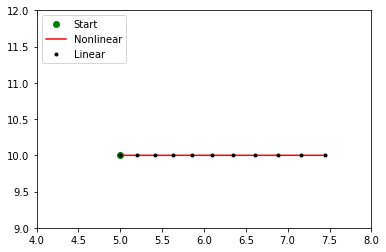

In [3]:
# Your code here.
x_init  = 5
y_init  = 10
theta_init = 0
v_init     = 2
a_input    = 1
phi_input  = 0.0001

state_init = [x_init, y_init, theta_init, v_init]
state_predictions_nonlinear = nonlinear_vehicle_model(state_init, [a_input, phi_input], 10)
state_predictions_linear = linear_vehicle_model(A, B, state_init, [a_input, phi_input], 10)

make_model_comparison_plot(state_predictions_nonlinear, state_predictions_linear)

### Part D
    
Task: Fill out the state and input values from Problem D and look at the resulting plot.  The plot should help you to visualize the difference between using a linear model and a nonlinear model for this specific starting state and input.

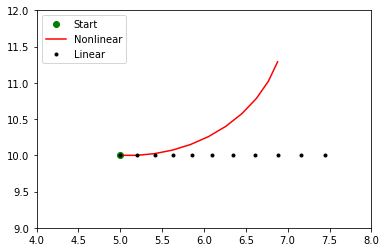

[ 6.87984693 11.28998941  1.3384411   3.        ]
[ 7.45 10.    0.    3.  ]


In [4]:
# Your code here.
x_init  = 5
y_init  = 10
theta_init = 0
v_init     = 2
a_input    = 1
phi_input  = 0.5

state_init = [x_init, y_init, theta_init, v_init]
state_predictions_nonlinear = nonlinear_vehicle_model(state_init, [a_input, phi_input], 10)
state_predictions_linear = linear_vehicle_model(A, B, state_init, [a_input, phi_input], 10)

make_model_comparison_plot(state_predictions_nonlinear, state_predictions_linear)
print(state_predictions_nonlinear[10])
print(state_predictions_linear[10])